In [72]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize

import cv2
import numpy as np


In [77]:
from pathlib import Path
p = Path().cwd()
q = p/"Data"

target_dict = {'can': 0,
               'cardboard': 1,
               'glass bottle': 2,
               'plastic bottle': 3} # create dictionary mapping you data classes/labels to integer labels

images = [] # create an empty list
labels = [] # create an empty list

In [78]:
for fldr in q.iterdir(): 
    current_label = fldr.name # get the name of the current label 
    temp = q/current_label # here we are adding each if the inside folder name to the path so we can go through each of them
    for img in temp.iterdir():
      img = load_img(img) # load image
      img_array = img_to_array(img) # convert the image to an NumPy array 
      img_array_resized = smart_resize(img_array, size = (128,128)) # if necessary, resize the image to 128 by 128 
      images.append(img_array_resized) # add image to list of images 
      labels.append(fldr.name) # add label for this image to the list of labels 

In [79]:
images1 = np.array(images) # convert the list of images to a NumPy array 
labels1 = np.array(labels) # convert the list of labels to a NumPy array

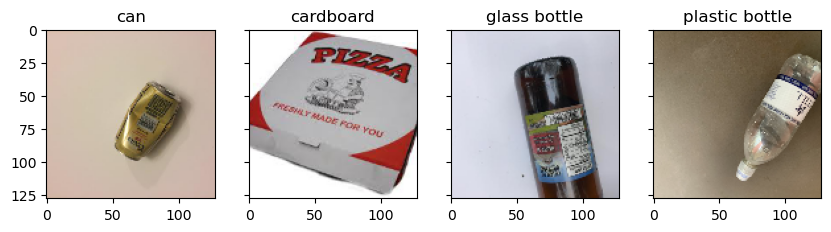

In [80]:
f, axarr = plt.subplots(1, 4, sharey=True, figsize=(10, 10))
axarr[0].set_title(labels1[1])
axarr[0].imshow(images1[1]/255)
axarr[1].set_title(labels1[1050])
axarr[1].imshow(images1[1050]/255)
axarr[2].set_title(labels1[2000])
axarr[2].imshow(images1[2000]/255)
axarr[3].set_title(labels1[4000])
axarr[3].imshow(images1[4000]/255)

In [81]:
labels_int = [target_dict.get(e, e) for e in labels1] # use the target_dict to convert the string labels to an array of integers
labels_int = np.array(labels_int) # convert the list of int labels to a NumPy array

In [101]:
from sklearn.model_selection import train_test_split
# 70% for training, 20% for validation, and 10% for testing
X_train, X_test, y_train, y_test = train_test_split(images1, labels_int, test_size=0.1, random_state=42)

In [102]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [103]:
# Normalizing the data and reshaping
X_train = X_train / 255.0
X_test = X_test / 255.0

In [104]:
# Shape of the training dataset
X_train.shape

(4046, 128, 128, 3)

In [105]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, MaxPool2D 
from tensorflow.keras import optimizers
from tensorflow.keras import losses

y_train = to_categorical(y_train, dtype="int")
y_test = to_categorical(y_test, dtype="int")

In [106]:
image_shape = X_train[0].shape
image_shape

(128, 128, 3)

In [134]:
# Creating a baseline model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, 2, 2, padding = 'same', input_shape = image_shape, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (3, 3)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation = 'relu'))
cnn_model.add(Dense(4, activation = 'softmax'))

In [135]:
cnn_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [136]:
cnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 21, 21, 32)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 14112)             0         
                                                                 
 dense_20 (Dense)            (None, 32)                451616    
                                                                 
 dense_21 (Dense)            (None, 4)                 132       
                                                                 
Total params: 452,164
Trainable params: 452,164
Non-trainable params: 0
_______________________________________________

In [137]:
import time

start_time = time.time()

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=128,
                        epochs=10,
                        verbose=1,
                        validation_split=0.2)

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/10
26/26 [==============================] - 2s 73ms/step - loss: 1.8013 - accuracy: 0.3659 - val_loss: 1.2117 - val_accuracy: 0.4222
Epoch 2/10
26/26 [==============================] - 2s 73ms/step - loss: 1.1894 - accuracy: 0.4710 - val_loss: 0.9905 - val_accuracy: 0.5494
Epoch 3/10
26/26 [==============================] - 2s 74ms/step - loss: 1.0172 - accuracy: 0.5464 - val_loss: 0.9137 - val_accuracy: 0.6432
Epoch 4/10
26/26 [==============================] - 2s 76ms/step - loss: 0.9301 - accuracy: 0.6017 - val_loss: 0.9114 - val_accuracy: 0.5938
Epoch 5/10
26/26 [==============================] - 2s 87ms/step - loss: 0.8479 - accuracy: 0.6422 - val_loss: 1.0157 - val_accuracy: 0.5593
Epoch 6/10
26/26 [==============================] - 2s 82ms/step - loss: 0.7973 - accuracy: 0.6777 - val_loss: 0.8171 - val_accuracy: 0.6494
Epoch 7/10
26/26 [==============================] - 2s 86ms/step - loss: 0.7349 - accuracy: 0.7101 - val_loss: 0.7351 - val_accuracy: 0.6580
Epoch 8/10
26

## Second Model

In [138]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=image_shape))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
 
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
 
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
 
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(4, activation='softmax'))

In [139]:
# Explore the structure of the NN
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_37 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 61, 61, 64)        36928     
                                                     

In [140]:
model2.compile(loss ='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.001),
              metrics =['accuracy'])

In [141]:
start_time = time.time()

history1 = model2.fit(X_train, y_train,
                      batch_size=128,
                      epochs=10,
                      verbose=1,
                      validation_split=0.2)

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/10
26/26 [==============================] - 83s 3s/step - loss: 1.3298 - accuracy: 0.3387 - val_loss: 1.2303 - val_accuracy: 0.3642
Epoch 2/10
26/26 [==============================] - 163s 6s/step - loss: 1.1826 - accuracy: 0.4005 - val_loss: 1.0279 - val_accuracy: 0.5086
Epoch 3/10
26/26 [==============================] - 167s 6s/step - loss: 0.9582 - accuracy: 0.5887 - val_loss: 0.8443 - val_accuracy: 0.6593
Epoch 4/10
26/26 [==============================] - 156s 6s/step - loss: 0.8545 - accuracy: 0.6561 - val_loss: 0.7328 - val_accuracy: 0.7111
Epoch 5/10
26/26 [==============================] - 136s 5s/step - loss: 0.8485 - accuracy: 0.6619 - val_loss: 0.7402 - val_accuracy: 0.7074
Epoch 6/10
26/26 [==============================] - 134s 5s/step - loss: 0.6566 - accuracy: 0.7370 - val_loss: 0.6059 - val_accuracy: 0.7593
Epoch 7/10
26/26 [==============================] - 145s 6s/step - loss: 0.5838 - accuracy: 0.7732 - val_loss: 0.5922 - val_accuracy: 0.7642
Epoch 8/10
26/